## Predicting California Housing Price With Linear Regression
- Database used: sklearn's california_housing
- Model used: Linear Regression

### Importing The Data

In [11]:
from sklearn.datasets import fetch_california_housing
import numpy as np
from sklearn.model_selection import train_test_split

In [12]:
housing = fetch_california_housing()

In [13]:
X = housing.data
y = housing.target
names = housing.feature_names

### Spliting the Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling
- Important Note: When scaling test dataset, we use the mean and SD of the training data set, not the mean and SD of the test datasets. This is because we use the test dataset as a verdict to test our model's performance on unseen data, hence, we don't want to give our model any information except the X_test, including the mean and SD of the test dataset.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training The Model

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

training_error = np.sqrt(mean_squared_error(y_train, model.predict(X_train_scaled)))
error = np.sqrt(mean_squared_error(y_test, y_pred))

print("Error on training set", training_error)
print("Error on test set", error)

Error on training set 0.7196757085831575
Error on test set 0.7455813830127763


### Prediction Function
use the function below to get the estimated price for a house, guessed by the model

In [17]:
def predict(x):
  x = x.reshape(1, -1)
  x = scaler.transform(x)
  return model.predict(x)[0]

x = np.array([8.3252, 41, 6.98412698, 1.02380952, 322, 2.55555556, 37.88, -122.23])
print(predict(x))

4.151942683262842


### Vizual Plot
A quick look on the model's performance, visually.

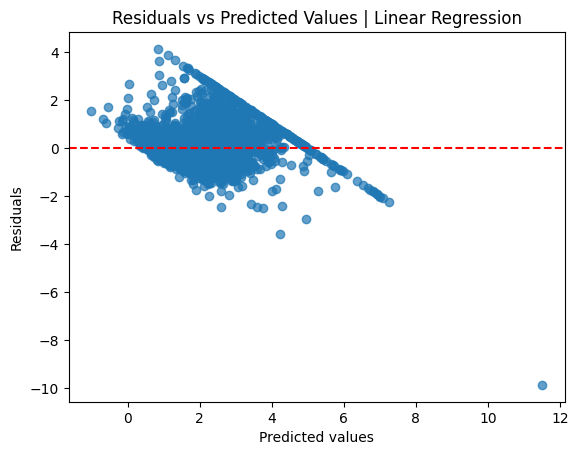

In [18]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')  # reference line at 0
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values | Linear Regression")
plt.show()

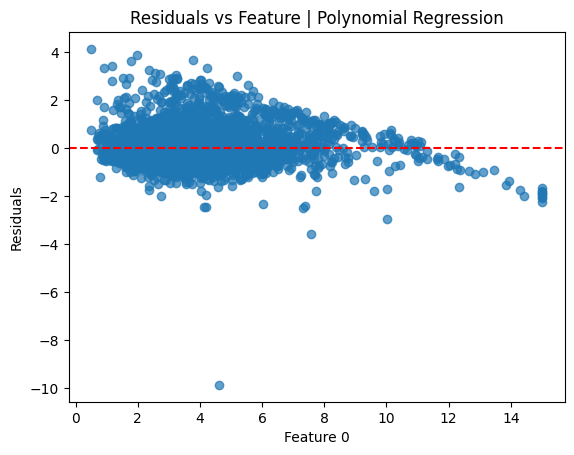

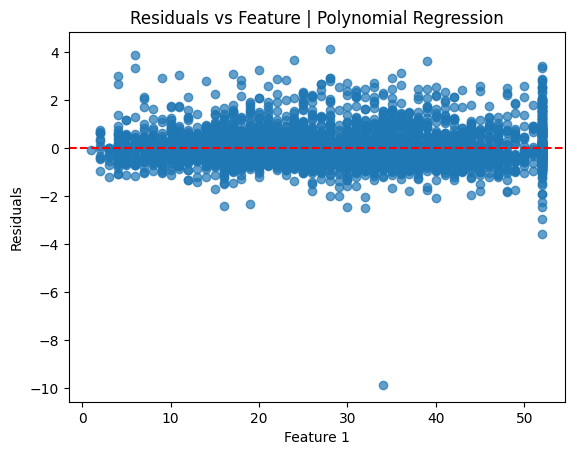

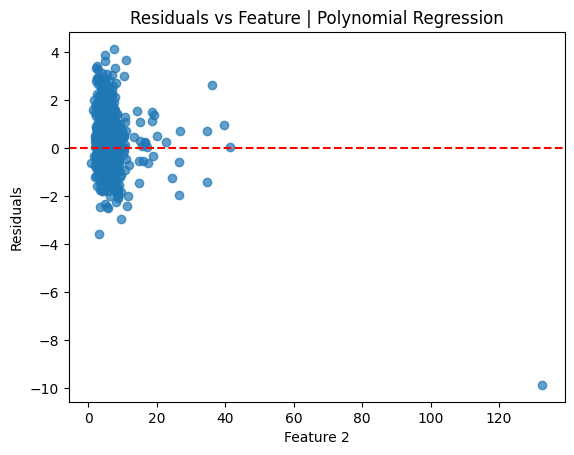

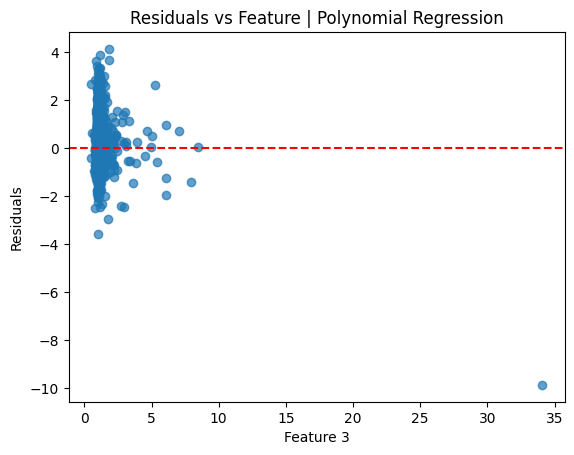

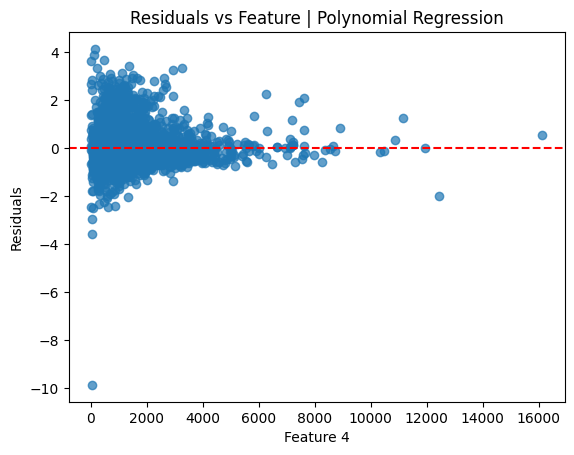

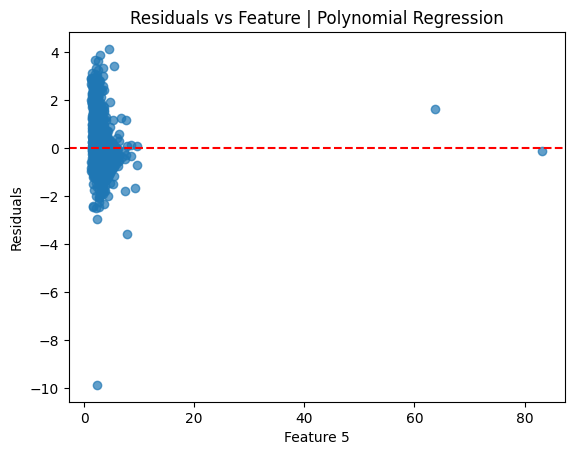

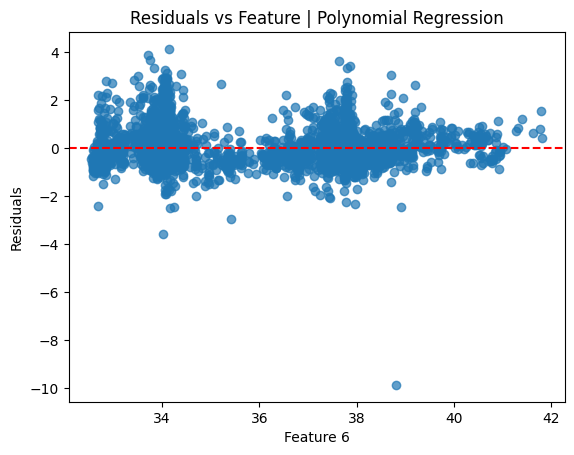

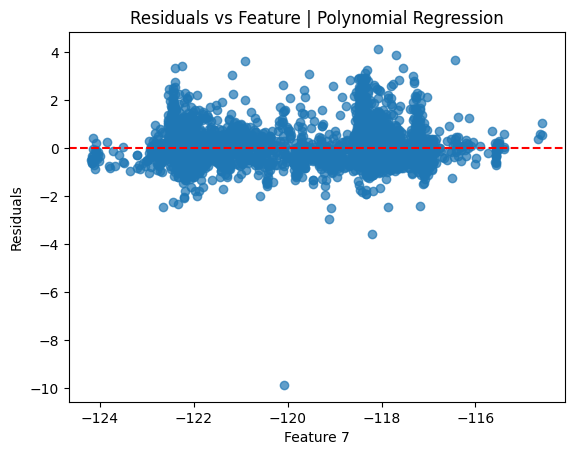

In [19]:

for feature_index in range(8):
  plt.scatter(X_test[:, feature_index], residuals, alpha=0.7)
  plt.axhline(0, color='red', linestyle='--')
  plt.xlabel(f"Feature {feature_index}")
  plt.ylabel("Residuals")
  plt.title("Residuals vs Feature | Polynomial Regression")
  plt.show()